In [1]:
import elo

In [2]:
test = elo.ELO(player_list=['Ryan','Sean','Michael'])

TypeError: __init__() got an unexpected keyword argument 'player_list'

In [3]:
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1600, 'Ryan': 1600}


In [4]:
test.do_competition(winner='Ryan',loser='Sean')
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1584.0, 'Ryan': 1616.0}


In [5]:
test.do_competition(winner='Ryan',loser='Sean')
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1569.4695015289756, 'Ryan': 1630.5304984710244}


In [6]:
test.season_reset()
test.EM.show_cache()

{'Michael': 1600.0, 'Sean': 1584.7347507644877, 'Ryan': 1615.2652492355123}


# CFB Sample Data Testing
___

In [3]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

import elo

cfb_df = pd.read_csv('cfb_sample_data.csv').dropna(subset=['Winning','Losing'])

In [4]:
write = False
model_log = []
for rf in np.linspace(2.5,4.5,21):#[3.25]:
    for K in np.linspace(25,35,21):#[10,15,20,25,30,35,40,45,50,55,60]:
        for sdf in [.925]:#np.linspace(.65,1.5,20):
            wrong = 0
            cut = cfb_df[['Year','Winning','Winning Points','Losing','Losing Points']].copy()
            if write:
                cut['Winning W Prob'] = .5
                cut['Losing W Prob'] = .5

            cfb = elo.ELO(K=K, reset_factor=rf, score_div_factor=sdf)
            for game in range(len(cut)):
                try:
                    if cut['Year'][game]> cut['Year'][game-1]:
                        cfb.season_reset()
                except:
                    pass
                w_prob, l_prob = cfb.do_competition(winner=cut['Winning'][game],
                                                    loser=cut['Losing'][game], 
                                                    scoring={'win_score':cut['Winning Points'][game],
                                                             'lose_score':cut['Losing Points'][game]})
                if w_prob < l_prob:
                    if cut['Year'][game] not in [2011,2012]:
                        wrong += 1
                if write:
                    cut.loc[game,'Winning W Prob'], cut.loc[game,'Losing W Prob'] = w_prob, l_prob
                    wrong = len(cut[(cut['Winning W Prob'] < cut['Losing W Prob']) & ~(cut['Year'].isin([2011,2012]))])
            model_log.append({'rf':rf,'K':K,'sdf':sdf,'wrongs':wrong})

In [5]:
ms = pd.DataFrame(model_log)
ms.head()
del ms['sdf']
ms_ = ms.groupby(['K','rf']).first().unstack(level=1)['wrongs']
ms_

rf,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5
K,,,,,,,,,,,,,,,,,,,,,
25.0,1138,1131,1136,1131,1128,1130,1125,1125,1122,1124,...,1124,1126,1126,1124,1124,1129,1129,1130,1128,1126
25.5,1139,1133,1129,1132,1126,1124,1126,1122,1120,1123,...,1123,1123,1122,1122,1120,1124,1124,1127,1126,1126
26.0,1138,1137,1131,1130,1126,1121,1121,1120,1115,1117,...,1120,1121,1122,1122,1122,1119,1121,1123,1125,1126
26.5,1137,1136,1133,1130,1124,1121,1120,1115,1116,1113,...,1120,1116,1116,1120,1121,1117,1120,1121,1122,1124
27.0,1136,1136,1130,1126,1126,1121,1117,1116,1114,1108,...,1113,1116,1113,1116,1116,1116,1117,1118,1117,1120
27.5,1139,1133,1133,1133,1126,1120,1118,1117,1112,1110,...,1110,1111,1113,1115,1115,1117,1114,1116,1115,1115
28.0,1139,1136,1136,1132,1123,1120,1118,1119,1114,1109,...,1113,1113,1112,1114,1112,1116,1115,1115,1113,1114
28.5,1138,1137,1134,1133,1130,1123,1121,1118,1117,1112,...,1112,1108,1115,1109,1113,1113,1115,1117,1114,1116
29.0,1136,1135,1131,1133,1130,1126,1121,1117,1119,1111,...,1108,1108,1111,1114,1111,1110,1112,1114,1117,1117


Text(0.5, 0, 'Inncorrectly Predicted Games')

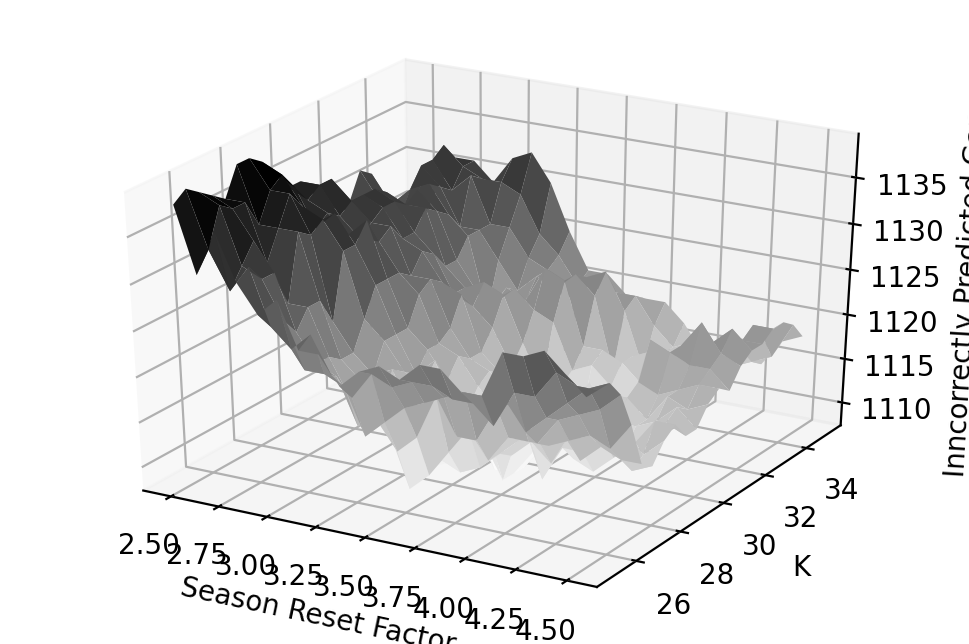

In [24]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

x = ms_.columns.tolist()
y = ms_.index.tolist()
X, Y = np.meshgrid(x, y)
z = ms_

# Plot the surface
ax.plot_surface(X, Y, z,cmap='binary' )
ax.set_xlabel('Season Reset Factor')
ax.set_ylabel('K')
ax.set_zlabel('Inncorrectly Predicted Games')

In [30]:
ms_.loc[28.0:30.0,3.4:3.8]

rf,3.4,3.5,3.6,3.7,3.8
K,,,,,
28.0,1109,1110,1113,1113,1112
28.5,1112,1108,1112,1108,1115
29.0,1111,1112,1108,1108,1111
29.5,1113,1112,1110,1108,1111
30.0,1115,1113,1111,1110,1112


In [ ]:
# SET K & reset_factor
K = 29.0
rf = 3.6

# Running on CFB DataFrame

In [78]:
cfb_df

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Winning,Winning Points,Losing,Losing Points,Year
0,9/1/78,Penn State,10,Temple,7,-24.5,Penn State,10,Temple,7,1978
1,9/2/78,Arkansas State,20,Tulsa,21,1,Tulsa,21,Arkansas State,20,1978
2,9/2/78,East Carolina,14,Western Carolina,6,,East Carolina,14,Western Carolina,6,1978
3,9/2/78,Eastern Michigan,3,Northern Michigan,30,,Northern Michigan,30,Eastern Michigan,3,1978
4,9/2/78,Nebraska,3,Alabama,20,11.5,Alabama,20,Nebraska,3,1978
...,...,...,...,...,...,...,...,...,...,...,...
25079,12/7/13,Duke,7,Florida State,45,29.5,Florida State,45,Duke,7,2013
25080,12/7/13,Stanford,38,Arizona State,14,3.5,Stanford,38,Arizona State,14,2013
25081,12/7/13,Ohio State,24,Michigan State,34,-5.5,Michigan State,34,Ohio State,24,2013
25082,12/7/13,Utah State,17,Fresno State,24,3,Fresno State,24,Utah State,17,2013


In [94]:
cfb_df = pd.read_csv('cfb_long_sample_data.csv').dropna(subset=['Winning','Losing'])
cut = cfb_df[['Year','Winning','Winning Points','Losing','Losing Points','Date']].copy()
cut['Winning W Prob'] = .5
cut['Losing W Prob'] = .5

cfb = elo.ELO(K=K, reset_factor=rf, score_div_factor=.975)
for game in range(len(cut)):
    try:
        if cut['Year'][game] > cut['Year'][game-1]:
            cfb.season_reset()
    except:
        pass
    current_elo = cfb.EM.member_elo_cache
    try:
        cut.loc[game,'Winning ELO'], cut.loc[game,'Losing ELO'] = (current_elo[cut['Winning'][game]],
                                                                       current_elo[cut['Losing'][game]])
    except: 
        cut.loc[game,'Winning ELO'], cut.loc[game,'Losing ELO'] = cfb.EM.starting_elo,cfb.EM.starting_elo
    w_prob, l_prob = cfb.do_competition(winner=cut['Winning'][game],
                                        loser=cut['Losing'][game], 
                                        scoring={'win_score':cut['Winning Points'][game],
                                                 'lose_score':cut['Losing Points'][game]})
    
    cut.loc[game,'Winning W Prob'], cut.loc[game,'Losing W Prob'] = w_prob, l_prob

In [95]:
#UPSETS
up = cut[(cut['Winning W Prob'] <= cut['Losing W Prob'])]

In [96]:
a = cut.groupby('Year').count()[['Winning']].join(up.groupby('Year').count()[['Losing']]).rename(columns={'Winning':'Games',
                                                                                                     'Losing':'Upsets'})

In [97]:
a['Correct'] = (a['Games']-a['Upsets'])/a['Games']

In [98]:
%matplotlib inline

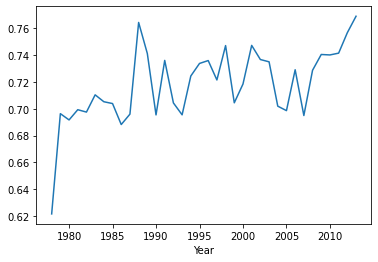

In [99]:
a['Correct'].plot()

In [100]:
(float(len(cut))-float(len(up)))/float(len(cut))

0.7180672938925211

## THE TOP 25

In [42]:
t25 = pd.DataFrame.from_dict(cfb.EM.member_elo_cache, orient='index').sort_values(0, ascending=False)[:25].reset_index()

In [45]:
real_ranks = pd.read_excel('2013_weekly_ranking.xlsx')

In [46]:
def remove_digits(name):
    new_name = name
    for number in range(10):
        new_name = new_name.split('({number_}'.format(number_=number))[0]
    return new_name

In [47]:
for column in real_ranks.columns.tolist():
    real_ranks[column] = real_ranks[column].apply(lambda x: remove_digits(x))

In [48]:
t25.join(real_ranks[['Week 15']])

,index,0,Week 15
0,Florida State,2189.718785,Florida State
1,Alabama,2134.460276,Auburn
2,Stanford,2129.581353,Alabama
3,Michigan State,2101.368809,Michigan State
4,South Carolina,2075.127901,Stanford
5,Louisiana State,2069.538409,Baylor
6,Ohio State,2064.665103,Ohio State
7,Auburn,2053.345011,South Carolina
8,Oklahoma State,2048.696876,Missouri
9,Baylor,2048.297252,Oregon


In [49]:
elo.ELO.get_win_probibility(2129.283917,1953.969015)

(0.7328623253498753, 0.26713767465012467)

In [50]:
# Problems with DB
cut[cut['Winning Points'] <= cut['Losing Points']]

,Year,Winning,Winning Points,Losing,Losing Points,Winning W Prob,Losing W Prob
39,1978,Northwestern,0,Illinois,0,0.500000,0.500000
87,1978,Kentucky,14,South Carolina,14,0.409183,0.590817
168,1978,Oregon State,13,Tennessee,13,0.475174,0.524826
171,1978,Princeton,14,Cornell,14,0.500000,0.500000
209,1978,Chattanooga,14,Middle Tennessee,14,0.642704,0.357296
...,...,...,...,...,...,...,...
11610,1995,Rice,21,Army,21,0.526072,0.473928
11708,1995,Oklahoma,24,Texas,24,0.476566,0.523434
11718,1995,Toledo,28,Miami-Ohio,28,0.601415,0.398585
11814,1995,Southern Cal,21,Washington,21,0.574053,0.425947


In [51]:
cut

,Year,Winning,Winning Points,Losing,Losing Points,Winning W Prob,Losing W Prob
0,1978,Penn State,10,Temple,7,0.500000,0.500000
1,1978,Tulsa,21,Arkansas State,20,0.500000,0.500000
2,1978,East Carolina,14,Western Carolina,6,0.500000,0.500000
3,1978,Northern Michigan,30,Eastern Michigan,3,0.500000,0.500000
4,1978,Alabama,20,Nebraska,3,0.500000,0.500000
...,...,...,...,...,...,...,...
25079,2013,Florida State,45,Duke,7,0.837112,0.162888
25080,2013,Stanford,38,Arizona State,14,0.598502,0.401498
25081,2013,Michigan State,34,Ohio State,24,0.414343,0.585657
25082,2013,Fresno State,24,Utah State,17,0.491689,0.508311


In [160]:
all_elos = pd.concat([cut[['Winning','Date','Year','Winning W ELO']].rename(columns={'Winning':'team',
                                                           'Winning W ELO':'elo'}),
           cut[['Losing','Date','Year','Losing W ELO']].rename(columns={'Losing':'team',
                                                           'Losing W ELO':'elo'})])


In [161]:
final_game_dates = all_elos.groupby(['team','Year']).max()['Date'].reset_index()

In [162]:
final_game = pd.merge(all_elos,final_game_dates, how='inner')

In [172]:
rolling_elo = final_game.groupby(['team']).rolling(4).mean()[['elo']]

In [177]:
rolling_elo[rolling_elo['elo'] > rolling_elo['elo'].max()-50]

elo
team                           
Alabama       2615  2048.288467
Florida       2299  2036.091595
Florida State 1218  2021.282869
              1257  2025.338726
              1631  2030.431166
              1686  2039.407853
              1847  2026.862115
Miami-Florida 885   2021.221096
              1050  2034.574622
              1076  2029.855859
              1136  2022.455409
              1923  2020.522922
Nebraska      1435  2024.854560
              1457  2032.521465
Southern Cal  2070  2055.214654
              2140  2069.875990
              2249  2058.169291